In [50]:
from utils import *
import numpy as np
import pickle as pkl
from tqdm import tqdm
import pandas as pd
import random
import matplotlib.pyplot as plt
from models import AD1
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

In [38]:
pip install corner

Note: you may need to restart the kernel to use updated packages.


In [2]:
colors ={'u':"#00c2f2",
         'g':"#59b359",
         'r':"#e51f00",
         'i':"#502db3",
         'z':"#ffaa00",
         'y':"#f2b6de"
        }

classes = ['uLens-Single',
           'uLens-Binary']

In [3]:
# read the first 20 data points of the lightcurves in each of gri bands

data, label = read_data(n_points = 5)

2it [00:07,  3.70s/it]


In [4]:
#split into train and test sets

random.seed(10)
data_size = len(label)
shuffler = np.random.permutation(len(label))
data = np.asarray(data)[shuffler]
train_fract = 0.9
train_size = int(train_fract*data_size)
train_set = data[:train_size]
train_label = np.asarray(label)[:train_size]

test_set = data[train_size:]
test_label = np.asarray(label)[train_size:]

In [5]:
# Read an example light curve

class_ind = 0
ind = 8

f = train_set[train_label == class_ind][ind]

Text(0, 0.5, 'Flux')

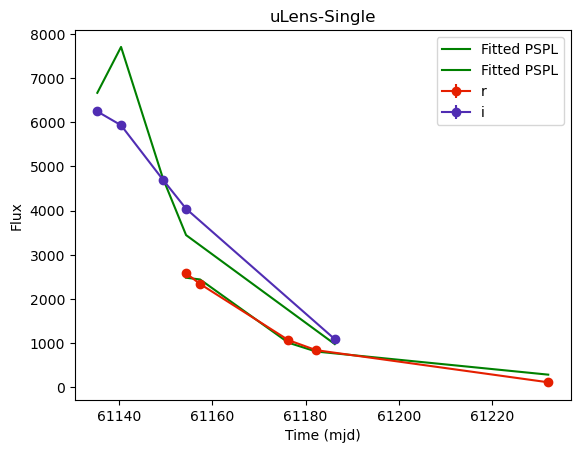

In [10]:
for b, band in enumerate(['r', 'i']):
    
    params_fit, fun_ = fit_PSPL(f[:,3*b], f[:,3*b+1], merr=f[:,3*b+2])
    

    plt.errorbar(f[:,3*b],
                 f[:,3*b+1],
                 yerr = f[:,3*b+2],
                 fmt = 'o-',
                 color = colors[band],
                 label = band)
    plt.plot(f[:,3*b], fun(f[:,3*b], *list(params_fit['x'])), 'g-', label = 'Fitted PSPL')

    
plt.legend()
plt.title(classes[class_ind])
plt.xlabel('Time (mjd)')
plt.ylabel('Flux')

In [18]:
all_params = np.zeros((len(data), 5, 2))
for d, dat in tqdm(enumerate(data)):
    for b, band in enumerate(['r', 'i']):
        all_fit_res, chi2 = fit_PSPL(data[d,:, 3*b], data[d,:, 3*b+1], merr=data[d,:, 3*b+2])
        all_params[d, :4, b]=all_fit_res['x']
        all_params[d, -1, b] = chi2

7951it [15:35,  8.50it/s]


/var/folders/6f/k2kn3hn52ws4kc_w0_zqfpy40000gp/T/ipykernel_13019/1350992417.py:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


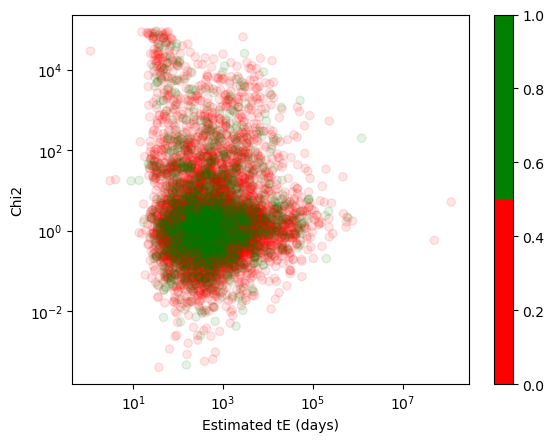

In [26]:
colormap = ListedColormap(['red', 'green'])
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_clim(vmin=np.min(label), 
            vmax=np.max(label))
colors = colormap(label)
plt.scatter(all_params[:, 1, 1], all_params[:, -1, 1], c=colors, alpha=0.1)
plt.colorbar(sm)
plt.ylabel('Chi2')
plt.xlabel('Estimated tE (days)')
plt.yscale('log')
plt.xscale('log')


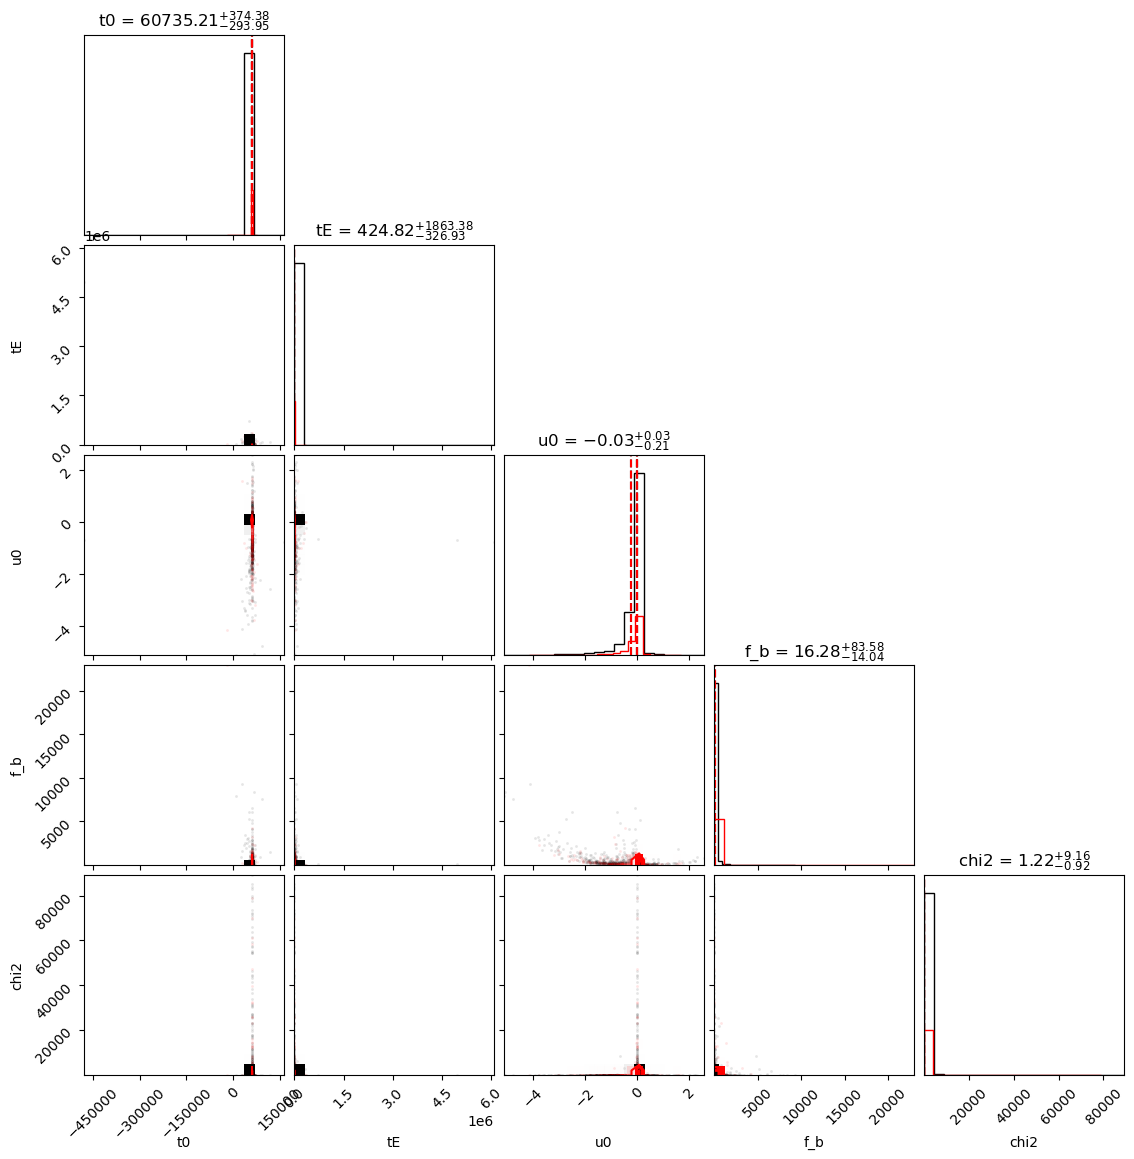

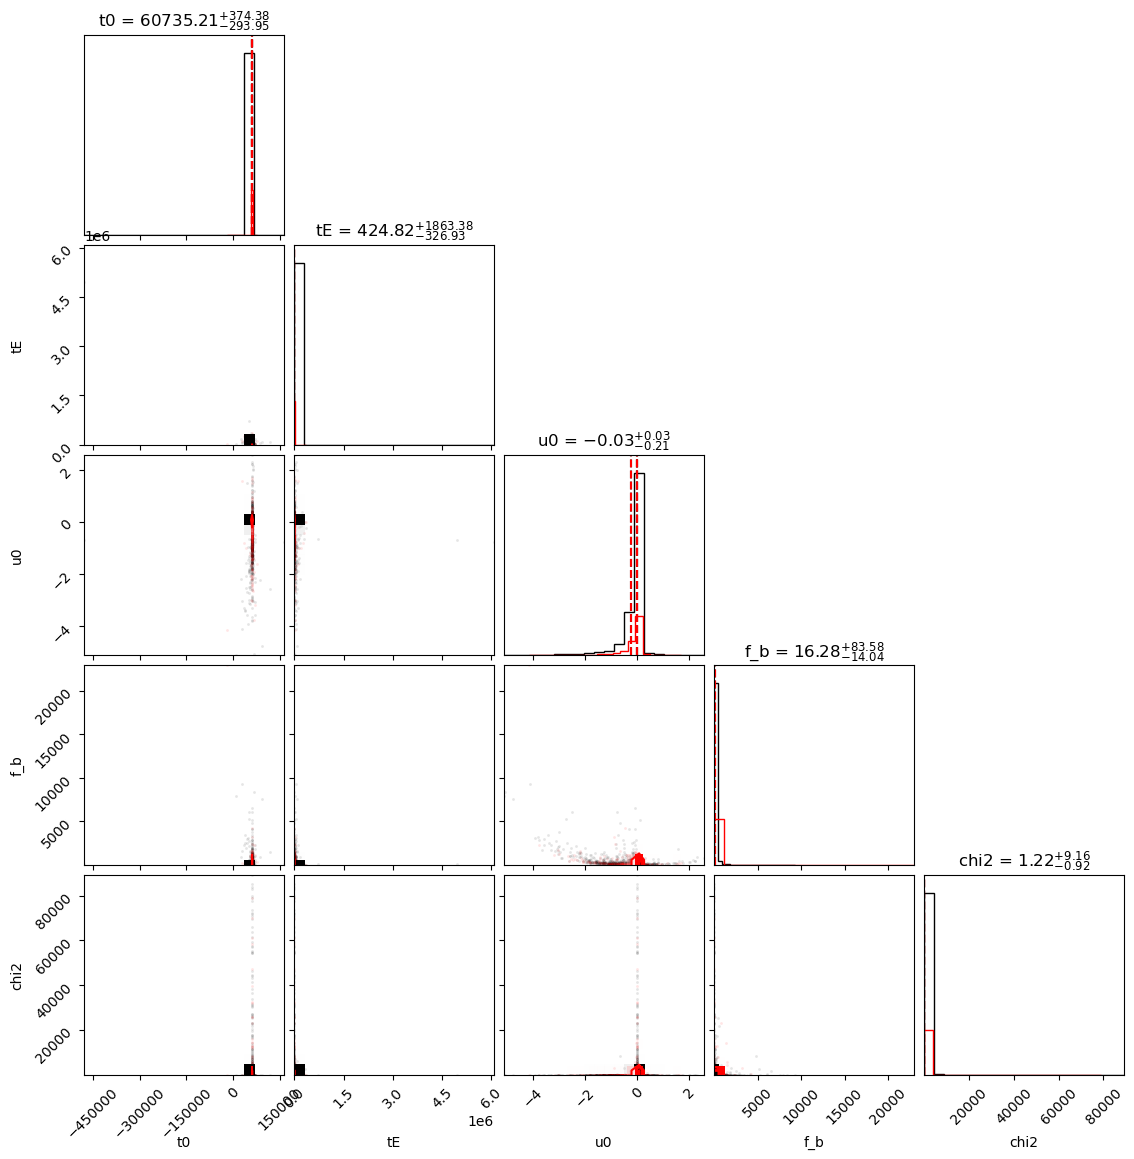

In [56]:
import corner
labels_ = ['t0','tE','u0', 'f_b', 'chi2']
scaler = StandardScaler()
plot_data = scaler.fit_transform(all_params[:,:,0])
figure = corner.corner(all_params[:,:,0][label==0], 
                       labels=labels_,
                       quantiles=(0.16,0.5,  0.84),
                      show_titles=True,
                       color='black',
                        title_kwargs={"fontsize": 12})
corner.corner(all_params[:,:,0][label==1], 
                       labels=labels_,
                       quantiles=(0.16,0.5,  0.84),
                      show_titles=True,
                       color='red',
                        fig=figure,
                        title_kwargs={"fontsize": 12})


In [52]:
plot_data.shape

AttributeError: 'StandardScaler' object has no attribute 'shape'

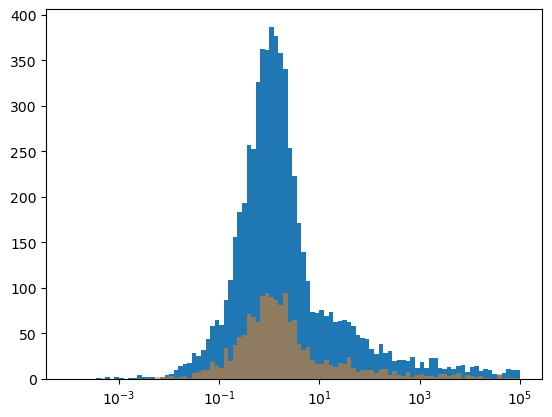

In [34]:
plt.hist(all_params[:, -1, 1][label==0], bins=np.logspace(np.log10(1e-4),np.log10(1e5), 100))
plt.hist(all_params[:, -1, 1][label==1], bins=np.logspace(np.log10(1e-4),np.log10(1e5), 100), alpha=0.5)

plt.xscale('log')

In [35]:
len(all_params[:, -1, 1][label==0])

6377

In [36]:
len(all_params[:, -1, 1][label==1])

1574